# Creating Customer Segments
## Unsupervised Learning Project

In this project, we will analyze a dataset containing data on various customers' annual spending amounts (reported in *monetary units*) of diverse product categories for internal structure. The overall goal of this project is to best describe the variation in the different types of customers that a wholesale distributor interacts with. In doing so, this would hopefully equip the distributor with insight into how to best structure their delivery service to meet the needs of each customer.

The dataset for this project can be found on the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers). For the purposes of this project, the features `'Channel'` and `'Region'` will be excluded in the analysis — with focus instead on the six product categories recorded for customers.

In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display # Allows the use of display() for DataFrames

# Import supplementary visualizations code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the wholesale customers dataset
try:
    data = pd.read_csv("customers.csv")
    data.drop(['Region', 'Channel'], axis = 1, inplace = True)
    print("Wholesale customers dataset has {} samples with {} features each.".format(*data.shape))
except:
    print("Dataset could not be loaded. Is the dataset missing?")

Wholesale customers dataset has 440 samples with 6 features each.


## Data Exploration
In this section, we will begin exploring the data through visualizations and code to understand how each feature is related to the others. We will observe a statistical description of the dataset, consider the relevance of each feature, and select a few sample data points from the dataset.

Note that the dataset is composed of six important product categories: **'Fresh'**, **'Milk'**, **'Grocery'**, **'Frozen'**, **'Detergents_Paper'**, and **'Delicatessen'**. We will consider what each category represents in terms of products we could purchase.

In [2]:
# Display a description of the dataset
display(data.describe())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


### Implementation: Selecting Samples
To get a better understanding of the customers and how their data will transform through the analysis, it would be best to select a few sample data points and explore them in more detail. Below, three indices were chosen and added to the list that will represents the customers to track. 

In [3]:
# TODO: Select three indices of your choice you wish to sample from the dataset
indices = [30, 140, 300]

# Create a DataFrame of the chosen samples
samples = pd.DataFrame(data.loc[indices], columns = data.keys()).reset_index(drop = True)
print("Chosen samples of wholesale customers dataset:")
display(samples)

Chosen samples of wholesale customers dataset:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,18815,3610,11107,1148,2134,2963
1,17623,4280,7305,2279,960,2616
2,16448,6243,6360,824,2662,2005


Consider the total purchase cost of each product category and the statistical description of the dataset above for the sample customers. We will keep in mind: What kind of establishment (customer) could each of the three samples chosen represent?

The mean values are as follows:

* Fresh: 12000.2977
* Milk: 5796.2
* Grocery: 3071.9
* Detergents_paper: 2881.4
* Delicatessen: 1524.8

Looking at the total purchase of each product category above and comparing them with the medians of the distributions, we can guess that:

The first customer in the sample (Index 0), might be from a market that has a cafe. Here we see high amounts of Fresh, Grocery, Detergent_paper and Delicatessen. There is also near 50th percentile amounts of Milk which indicates there is a fair amount of this item being purchased but perhaps not on the level of a restuarant or a supermarket. The Delicatessen is higher than the other two customer samples and higher than the 50th percentile which may indicate there is a deli within the market and the cafe may provide deli items to their customers. 

The second customer in the sample (Index 1), might be from a mid-sized market. All the features are higher than the mean, but Detergents_paper is lower than the other two samples which may indicate this is not a high need for this business. Frozen foods are a high purchase item which may indicate a frozen food department. Delicatessen is also a high purchase and may indicate there is a deli within the market. 

The third customer in the sample (Index 2), may represent a mid-sized restaurant. We see a high purchase of milk and higher than mean levels for Groceries and Milk. We also see high purchases of produce and relatively low purchases of frozen goods. Restaurants that enjoy cooking with fresh food will want to avoid excessive frozen food purchases for usage in meals. The Detergents_paper feature is significantly higher than the mean and potentially signifies the high usage of napkins and/or paper towels. 

### Implementation: Feature Relevance
One interesting thought to consider is if one (or more) of the six product categories is actually relevant for understanding customer purchasing. That is to say, is it possible to determine whether customers purchasing some amount of one category of products will necessarily purchase some proportional amount of another category of products? We can make this determination quite easily by training a supervised regression learner on a subset of the data with one feature removed, and then score how well that model can predict the removed feature.


Below, we will split the dataset into training and testing sets, use a removed feature as a target label, import a decision tree regressor, set a `random_state`, and fit the learner to the training data. Lastly, we will report the prediction score of the testing set.

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

# TODO: Make a copy of the DataFrame, using the 'drop' function to drop the given feature
new_data = data.drop(['Detergents_Paper'],axis=1)

# TODO: Split the data into training and testing sets(0.25) using the given feature as the target
# Set a random state.
X_train, X_test, y_train, y_test = train_test_split(new_data,data['Detergents_Paper'],test_size=0.25,random_state=100)

# TODO: Create a decision tree regressor and fit it to the training set
regressor = DecisionTreeRegressor(random_state=100).fit(X_train,y_train)

# TODO: Report the score of the prediction using the testing set
score = regressor.score(X_test, y_test)

print (score)

0.7210295353820265


We tried to predict the 'Detergents_Paper' feature (i.e. annual spending on Detergents and Paper products), based on the other features in the dataset. 

The predicted R2 score was 0.7210. The R^2 falls between 0 and 1, and the model built for Detergents_paper has a relatively high score which can lead us to believe that this feature is not difficult to predict using the other features. 

Based upon the information here, it is safe to say that the 'Detergents_Paper' feature is not truly necessary for identifying customer’s spending habits due to the fact this feature does not add extra or key information to the data and can be learned from analyzing other features. In other words, this feature can be derived from other features in the dataset making it a less necessary feature. 

### Visualize Feature Distributions
To get a better understanding of the dataset, we can construct a scatter matrix of each of the six product features present in the data. If we found that the feature we attempted to predict above is relevant for identifying a specific customer, then the scatter matrix below may not show any correlation between that feature and the others. Alternatively, if it is believed that feature is not relevant for identifying a specific customer, the scatter matrix might show a correlation between that feature and another feature in the data. 

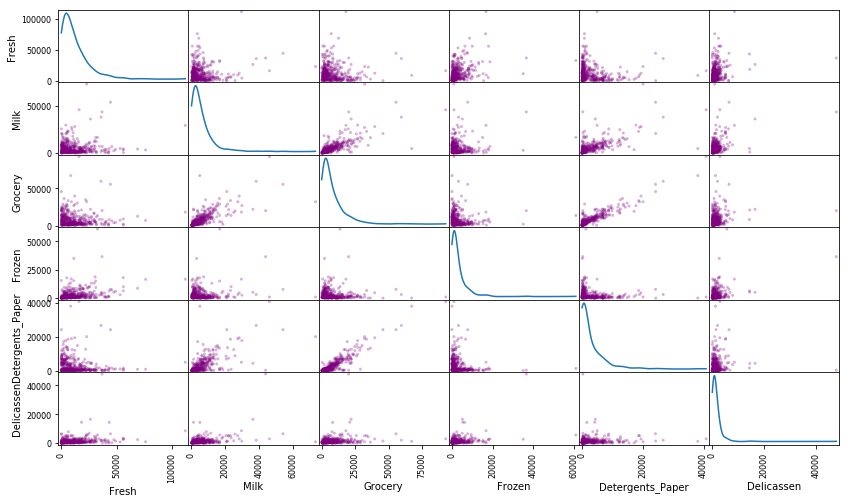

In [5]:
# Produce a scatter matrix for each pair of features in the data
pd.plotting.scatter_matrix(data, alpha = 0.3, figsize = (14,8), diagonal = 'kde', color = 'purple');

Based on the plot, there are some pairs of features that exhibit some degree of correlation. They include:

- Detergents_Paper and Milk
- Detergents_Paper and Grocery
- Grocery and Milk

According to the plots, the ‘Detergents_paper’ feature is correlated to other features in the dataset, and explains the high R^2 prediction score. 

The distribution of all the features appears to be quite similar. The distirbutions are strongly right-skewed (positive skeweness), and most of the data points lie within the first intervals. Based on the summary statistics of the features that were calculated earlier,  it is expected the mean and medians are accounting for extreme outliers. This confirms there is a significant difference between the mean and the median of the feature distributions.

## Data Preprocessing
In this section, we will preprocess the data to create a better representation of customers by performing a scaling on the data and detecting (and optionally removing) outliers. 

### Implementation: Feature Scaling
If the data is not normally distributed, especially if the mean and median vary significantly (indicating a large skew), it is most [often appropriate](http://econbrowser.com/archives/2014/02/use-of-logarithms-in-economics) to apply a non-linear scaling — particularly for financial data. One way to achieve this scaling is by using a [Box-Cox test](http://scipy.github.io/devdocs/generated/scipy.stats.boxcox.html), which calculates the best power transformation of the data that reduces skewness. A simpler approach which can work in most cases would be applying the natural logarithm.

Below, we will assign a copy of the data to `log_data` after applying logarithmic scaling and then assign a copy of the sample data to `log_samples` after applying logarithmic scaling. Visualing things with a nice scatterplot is helpful. 


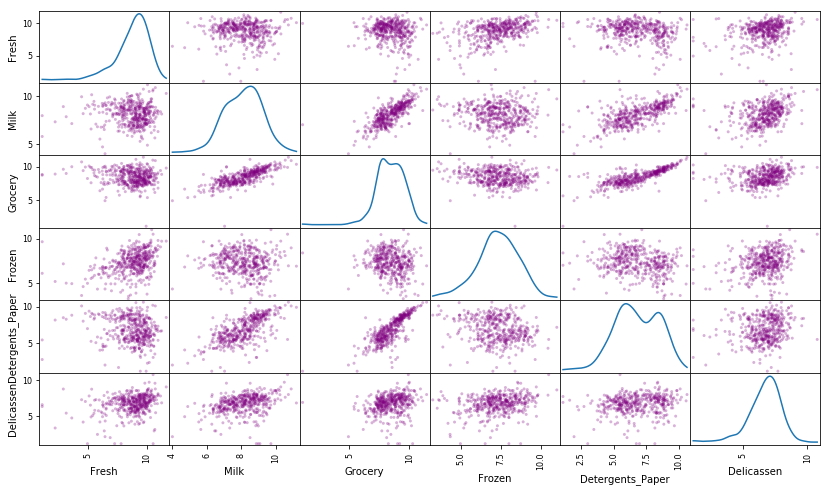

In [6]:
# TODO: Scale the data using the natural logarithm
log_data = data.apply(lambda x: np.log(x))

# TODO: Scale the sample data using the natural logarithm
log_samples = samples.apply(lambda x: np.log(x))

# Produce a scatter matrix for each pair of newly-transformed features
pd.plotting.scatter_matrix(log_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde', color = 'purple');

### Observation
After applying a natural logarithm scaling to the data, the distribution of each feature should appear much more normal. For any pairs of features we may have identified earlier as being correlated, observe here whether that correlation is still present (and whether it is now stronger or weaker than before).

In [7]:
# Display the log-transformed sample data
display(log_samples)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,9.842410,8.191463,9.315331,7.045777,7.665753,7.993958
1,9.776960,8.361708,8.896314,7.731492,6.866933,7.869402
2,9.707959,8.739216,8.757784,6.714171,7.886833,7.603399


### Implementation: Outlier Detection
Detecting outliers in the data is extremely important in the data preprocessing step of any analysis. The presence of outliers can often skew results which take into consideration these data points. There are many "rules of thumb" for what constitutes an outlier in a dataset. Here, we will use [Tukey's Method for identfying outliers](https://www.kdnuggets.com/2017/01/3-methods-deal-outliers.html): An *outlier step* is calculated as 1.5 times the interquartile range (IQR). A data point with a feature that is beyond an outlier step outside of the IQR for that feature is considered abnormal.

Below, the following has been implmented:

We assigned the value of the 25th percentile for the given feature to `Q1`, the value of the 75th percentile for the given feature has been assigned to `Q3`, the calculation of an outlier step for the given feature has been assigned to `step` and data points have been removed fromt he dataset by adding indices to `outliers`. 
Lastly, outliers have been removed and stored as `good_data`

In [8]:
# OPTIONAL: Select the indices for data points you wish to remove
outliers  = []

# For each feature find the data points with extreme high or low values
for feature in log_data.keys():
    
    # TODO: Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(log_data[feature],25)
    
    # TODO: Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(log_data[feature],75)
    
    # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = (Q3-Q1) * 1.5
    
    # Display the outliers
    print ("Data points considered outliers for the feature '{}':".format(feature))
    out = log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))]
    display(out)
    outliers = outliers + list(out.index.values)
    

#Creating list of more outliers which are the same for multiple features.
outliers = list(set([x for x in outliers if outliers.count(x) > 1]))    

print ("Outliers: {}".format(outliers))

# Remove the outliers, if any were specified 
good_data = log_data.drop(log_data.index[outliers]).reset_index(drop = True)
print ("The good dataset now has {} observations after removing outliers.".format(len(good_data)))

Data points considered outliers for the feature 'Fresh':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
81,5.389072,9.163249,9.575192,5.645447,8.964184,5.049856
95,1.098612,7.979339,8.740657,6.086775,5.407172,6.563856
96,3.135494,7.869402,9.001839,4.976734,8.262043,5.379897
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
171,5.298317,10.160530,9.894245,6.478510,9.079434,8.740337
193,5.192957,8.156223,9.917982,6.865891,8.633731,6.501290
218,2.890372,8.923191,9.629380,7.158514,8.475746,8.759669
304,5.081404,8.917311,10.117510,6.424869,9.374413,7.787382


Data points considered outliers for the feature 'Milk':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
86,10.039983,11.205013,10.377047,6.894670,9.906981,6.805723
98,6.220590,4.718499,6.656727,6.796824,4.025352,4.882802
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
356,10.029503,4.897840,5.384495,8.057377,2.197225,6.306275


Data points considered outliers for the feature 'Grocery':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442


Data points considered outliers for the feature 'Frozen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
38,8.431853,9.663261,9.723703,3.496508,8.847360,6.070738
57,8.597297,9.203618,9.257892,3.637586,8.932213,7.156177
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
145,10.000569,9.034080,10.457143,3.737670,9.440738,8.396155
175,7.759187,8.967632,9.382106,3.951244,8.341887,7.436617
264,6.978214,9.177714,9.645041,4.110874,8.696176,7.142827
325,10.395650,9.728181,9.519735,11.016479,7.148346,8.632128
420,8.402007,8.569026,9.490015,3.218876,8.827321,7.239215
429,9.060331,7.467371,8.183118,3.850148,4.430817,7.824446
439,7.932721,7.437206,7.828038,4.174387,6.167516,3.951244


Data points considered outliers for the feature 'Detergents_Paper':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
161,9.428190,6.291569,5.645447,6.995766,1.098612,7.711101


Data points considered outliers for the feature 'Delicassen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
109,7.248504,9.724899,10.274568,6.511745,6.728629,1.098612
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
137,8.034955,8.997147,9.021840,6.493754,6.580639,3.583519
142,10.519646,8.875147,9.018332,8.004700,2.995732,1.098612
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
183,10.514529,10.690808,9.911952,10.505999,5.476464,10.777768
184,5.789960,6.822197,8.457443,4.304065,5.811141,2.397895
187,7.798933,8.987447,9.192075,8.743372,8.148735,1.098612
203,6.368187,6.529419,7.703459,6.150603,6.860664,2.890372


Outliers: [128, 65, 66, 75, 154]
The good dataset now has 435 observations after removing outliers.


Our sample does not contain any of the outlier values. 

There were 5 data points that were considered outliers for more than one feature based on the definition above. To avoid the extreme loss of information by removing all outliers, only outliers that occur more than once are removed. 

It may be useful to analyze outliers independently to research how and potentially why they occurred, as a root cause analysis exercise. 

## Feature Transformation
In this section we will use principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

### Implementation: PCA

Now that the data has been scaled to a more normal distribution and has had any necessary outliers removed, we can now apply PCA to the `good_data` to discover which dimensions about the data best maximize the variance of features involved. In addition to finding these dimensions, PCA will also report the *explained variance ratio* of each dimension — how much variance within the data is explained by that dimension alone. Note that a component (dimension) from PCA can be considered a new "feature" of the space, however it is a composition of the original features present in the data.

This what we accomplished below:

We assigned the results of fitting PCA in six dimensions with `good_data` to `pca`, then applied a PCA transformation of `log_samples` using `pca.transform`, then lastly assigned the results to `pca_samples`. 

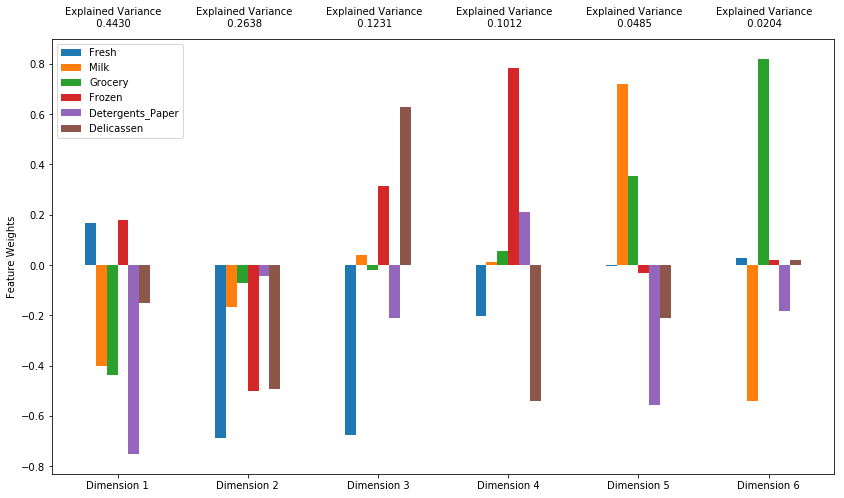

In [9]:
from sklearn.decomposition import PCA

# TODO: Apply PCA by fitting the good data with the same number of dimensions as features
pca = PCA().fit(good_data)

# TODO: Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)

# Generate PCA results plot
pca_results = vs.pca_results(good_data, pca)

The first and second features, explain approximately 71.9% of the variance in our data.

The first four features, explain approximately 93.14% of the variance in our data. 

A potential theory regarding customer spending: 

- Dimension 1 has high negative weights for Milk, Grocery, Detergents_Paper and Delicatessen features, while Fresh and Frozen have minimal positive weights. This dimension may represent internet cafes perhaps where the primary focus is not food.
- Dimension 2 has negative weights for all features which may represent a business that does not have anything to do with food such as a bank or a gym. 
- Dimension 3 has high positive weights for Delicatessen and Frozen features, and high negative weights for Detergents_paper and Fresh features. There is a very minimal positive weight for Milk. This dimension may represent delis. 
- Dimension 4 has positive weights for Frozen, Milk, Detergents_Paper and Grocery, while being negative for Fresh and Delicatessen. This dimension may represent hotels or motels where certain food items are necessary. 

### Observation

In [10]:
# Display sample log-data after having a PCA transformation applied
display(pd.DataFrame(np.round(pca_samples, 4), columns = pca_results.index.values))

,Dimension 1,Dimension 2,Dimension 3,Dimension 4,Dimension 5,Dimension 6
0,-1.1156,-1.3483,-0.1973,-0.9135,-0.4000,0.5608
1,-0.2702,-1.5501,0.1689,-0.4826,0.0230,0.2804
2,-1.2804,-0.9587,-0.4701,-0.9124,-0.2345,-0.2514


### Implementation: Dimensionality Reduction
When using principal component analysis, one of the main goals is to reduce the dimensionality of the data — in effect, reducing the complexity of the problem. Dimensionality reduction comes at a cost: Fewer dimensions used implies less of the total variance in the data is being explained. Because of this, the *cumulative explained variance ratio* is extremely important for knowing how many dimensions are necessary for the problem. Additionally, if a signifiant amount of variance is explained by only two or three dimensions, the reduced data can be visualized afterwards.

Below, the following has been implemented:
 We assigned the results of fitting PCA in two dimensions with `good_data` to `pca`, applied a PCA transformation of `good_data` using `pca.transform`, and then assigned the results to `reduced_data`, then lastly an assignment of a PCA transformation of `log_samples` using `pca.transform`, and an assignment of the results to `pca_samples`.

In [11]:
# TODO: Apply PCA by fitting the good data with only two dimensions
pca = PCA(n_components=2).fit(good_data)

# TODO: Transform the good data using the PCA fit above
reduced_data = pca.transform(good_data)

# TODO: Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)

# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

### Observation

In [12]:
# Display sample log-data after applying PCA transformation in two dimensions
display(pd.DataFrame(np.round(pca_samples, 4), columns = ['Dimension 1', 'Dimension 2']))

,Dimension 1,Dimension 2
0,-1.1156,-1.3483
1,-0.2702,-1.5501
2,-1.2804,-0.9587


## Visualizing a Biplot
A biplot is a scatterplot where each data point is represented by its scores along the principal components. The axes are the principal components (in this case `Dimension 1` and `Dimension 2`). In addition, the biplot shows the projection of the original features along the components. A biplot can help us interpret the reduced dimensions of the data, and discover relationships between the principal components and original features.

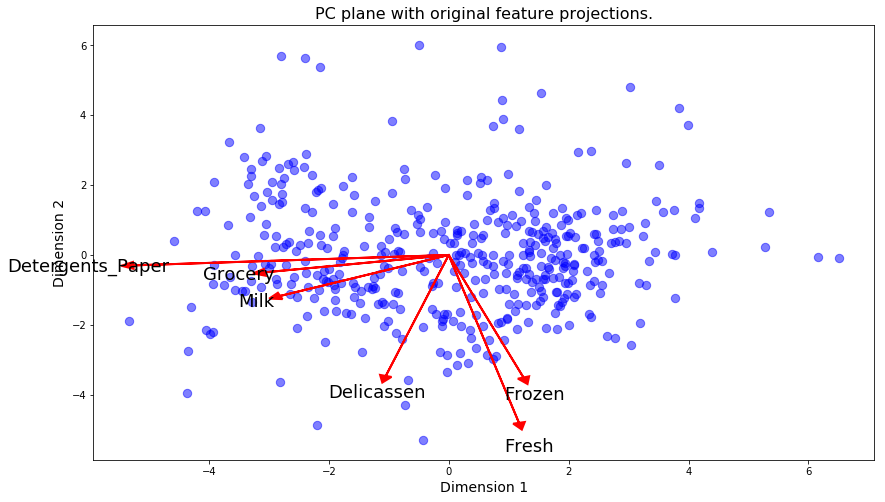

In [13]:
# Create a biplot
vs.biplot(good_data, reduced_data, pca)

### Observation

Once we have the original feature projections (in red), it is easier to interpret the relative position of each data point in the scatterplot. For instance, a point the lower right corner of the figure will likely correspond to a customer that spends a lot on `'Milk'`, `'Grocery'` and `'Detergents_Paper'`, but not so much on the other product categories. 

## Clustering

After reviewing different algorithms for analysis, we chose Gaussian Mixture Modeling for clutering. We will then recover specific data points from the clusters to understand their significance by transforming them back into their original dimension and scale. 

Advantages of K-Means clustering:

Simple to understand and interpret results. 
Excellent for clusters that have clear boundaries (have little overlap).

Advantages of Gaussian Mixture Model clustering:

Good for the estmation for softer clusters that does not have as clear boundaries (have overlap). 
Does not bias the cluster sizes to have specific structures. 
Because there is a chance that some of the clusters are overlapping, I think it would be best to use the Gaussian Mixture Model for this dataset. This is because there might be some hidden patterns in the data that we may miss by assigning only one cluster to each data point. 


### Implementation: Creating Clusters
Depending on the problem, the number of clusters that are  expected to be in the data may already be known. When the number of clusters is unknown, there is no guarantee that a given number of clusters best segments the data, since it is unclear what structure exists in the data — if any. However, we can quantify the "goodness" of a clustering by calculating each data point's *silhouette coefficient*. The [silhouette coefficient](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) for a data point measures how similar it is to its assigned cluster from -1 (dissimilar) to 1 (similar). Calculating the *mean* silhouette coefficient provides for a simple scoring method of a given clustering.

Here is what was accomplished in the code block below: 

We were able to fit a clustering algorithm to the `reduced_data` and assign it to `clusterer`, predicted the cluster for each data point in `reduced_data` using `clusterer.predict` and assign them to `preds`,found the cluster centers using the algorithm's respective attribute and assign them to `centers`,predicted the cluster for each sample data point in `pca_samples` and assign them `sample_preds`, then finally calculated the silhouette score of `reduced_data` against `preds`.

In [14]:
n_clusters = [10,8,6,4,3,2]

from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

for n in n_clusters:
    
    # TODO: Apply clustering algorithm of choice to the reduced data 
    clusterer = GaussianMixture(n_components=n).fit(reduced_data)

    # TODO: Predict the cluster for each data point
    preds = clusterer.predict(reduced_data)

    # TODO: Find the cluster centers
    centers = clusterer.means_

    # TODO: Predict the cluster for each transformed sample data point
    sample_preds = clusterer.predict(pca_samples)

    # TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
    score = silhouette_score(reduced_data,preds)
    
    print ("The silhouette_score for {} clusters is {}".format(n,score))

The silhouette_score for 10 clusters is 0.27166519748529544
The silhouette_score for 8 clusters is 0.3268410605574388
The silhouette_score for 6 clusters is 0.28202144806380913
The silhouette_score for 4 clusters is 0.33013862259237037
The silhouette_score for 3 clusters is 0.37420184754032176
The silhouette_score for 2 clusters is 0.42191684646261485


Of all the clusters that were attempted, the silhouette score for two clusters is the best at 0.4223246826459388.

### Cluster Visualization
Once we've chosen the optimal number of clusters for our clustering algorithm using the scoring metric above, we can now visualize the results by executing the code block below. Note that, for experimentation purposes, we  can adjust the number of clusters for the clustering algorithm to see various visualizations. However, the final visualization provided should correspond with the optimal number of clusters. 

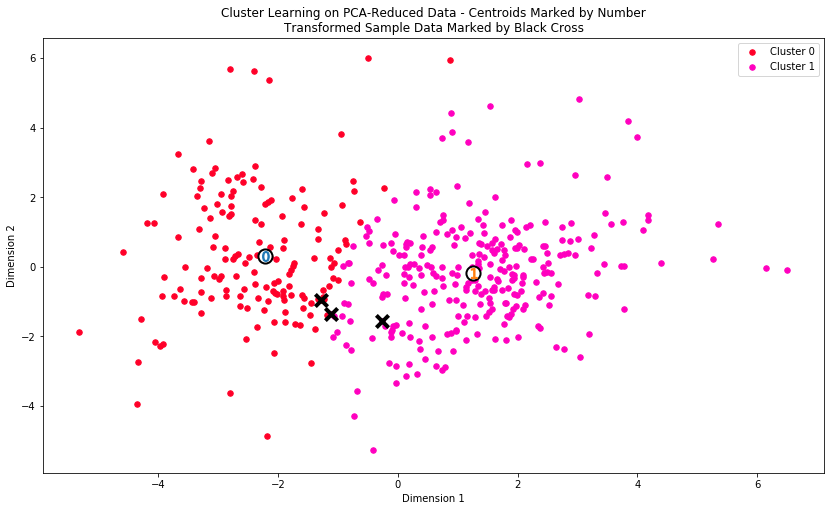

In [15]:
# Display the results of the clustering from implementation
vs.cluster_results(reduced_data, preds, centers, pca_samples)

### Implementation: Data Recovery
Each cluster present in the visualization above has a central point. These centers (or means) are not specifically data points from the data, but rather the *averages* of all the data points predicted in the respective clusters. For the problem of creating customer segments, a cluster's center point corresponds to *the average customer of that segment*. Since the data is currently reduced in dimension and scaled by a logarithm, we can recover the representative customer spending from these data points by applying the inverse transformations.

The follwing was implemented below: 

Applied the inverse transform to `centers` using `pca.inverse_transform` and assigned the new centers to `log_centers`, and applied the inverse function of `np.log` to `log_centers` using `np.exp` and assigned the true centers to `true_centers`.


In [16]:
# TODO: Inverse transform the centers
log_centers = pca.inverse_transform(centers)

# TODO: Exponentiate the centers
true_centers = np.exp(log_centers)

# Display the true centers
segments = ['Segment {}'.format(i) for i in range(0,len(centers))]
true_centers = pd.DataFrame(np.round(true_centers), columns = data.keys())
true_centers.index = segments
display(true_centers)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Segment 0,3552.0,7837.0,12219.0,870.0,4696.0,962.0
Segment 1,8953.0,2114.0,2765.0,2075.0,353.0,732.0


A guess for the values presented above: 

Segment 0: This segment best represents restaurants. Their spending on Fresh, and Frozen is higher than the median, and lower, but still close to median on Deli. 

Segment 1: This segment best represents supermarkets. They spend a higher than median amount on Milk, Grocery, Detergents_Paper and Deli, which are both essential to be stocked for customer consumption. 

In [17]:
# Display the predictions
for i, pred in enumerate(sample_preds):
    print("Sample point", i, "predicted to be in Cluster", pred)

Sample point 0 predicted to be in Cluster 1
Sample point 1 predicted to be in Cluster 1
Sample point 2 predicted to be in Cluster 0


Our guesses for Sample points 0 and 1, and 2 were restaurants and supermarkets. It seems that the predictions for clusters 0 and 1 may be correct, but it is doifficult to make that judegment. In the plot above, sample 1 is near the boundary of both clusters. 

## Conclusion

In this final section, we will investigate ways that we can make use of the clustered data. Consider how the different groups of customers, the ***customer segments***, may be affected differently by a specific delivery scheme. Next, we will consider how giving a label to each customer (which *segment* that customer belongs to) can provide for additional features about the customer data. Finally, we will compare the ***customer segments*** to a hidden variable present in the data, to see whether the clustering identified certain relationships.

Companies will often run [A/B tests](https://en.wikipedia.org/wiki/A/B_testing) when making small changes to their products or services to determine whether making that change will affect its customers positively or negatively. The wholesale distributor is considering changing its delivery service from currently 5 days a week to 3 days a week. However, the distributor will only make this change in delivery service for customers that react positively. 

Making the change to the delivery service means that products will be delivered less times during a week. 

The wholesale distributor can identify the clusters to conduct the A/B test, but the test should be done on one cluster at a time since the two clusters represent different types of customers, so their delivery needs may be different, and their reaction to change may also be differ 

Additional structure is derived from originally unlabeled data when using clustering techniques. Since each customer has a customer segment it best identifies with (depending on the clustering algorithm applied), we can consider ‘customer segment’ as an engineered feature for the data. 

Additional structure is derived from originally unlabeled data when using clustering techniques. Since each customer has a ***customer segment*** it best identifies with (depending on the clustering algorithm applied), we can consider *'customer segment'* as an **engineered feature** for the data. Assume the wholesale distributor recently acquired ten new customers and each provided estimates for anticipated annual spending of each product category. Knowing these estimates, the wholesale distributor wants to classify each new customer to a ***customer segment*** to determine the most appropriate delivery service.  

To label the new customers, the distributor will need to build and train a supervised learner on the data labeled with clustering. The data to fit will be the estimated spends, and the target variable will be the customer segment. They can then use the classifier to predict segments for new incoming data.

### Visualizing Underlying Distributions

At the beginning of this project, it was stated that the `'Channel'` and `'Region'` features would be excluded from the dataset so that the customer product categories were emphasized in the analysis. By reintroducing the `'Channel'` feature to the dataset, an interesting structure emerges when considering the same PCA dimensionality reduction applied earlier to the original dataset.

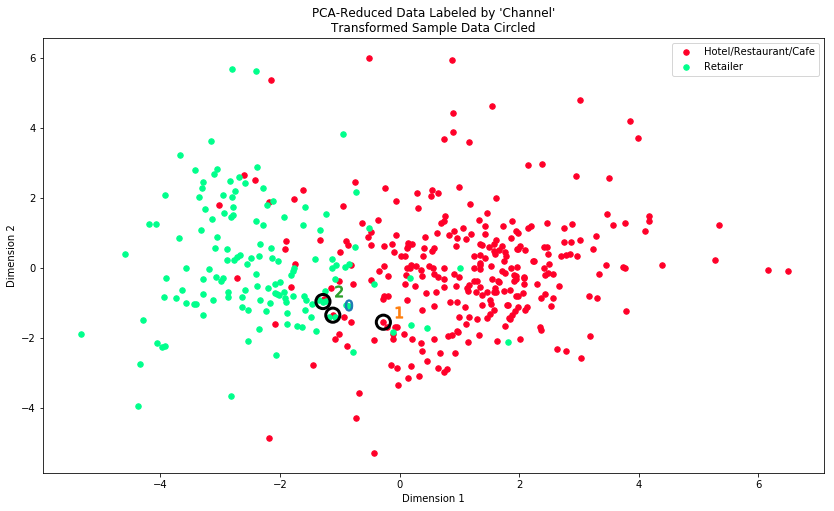

In [18]:
# Display the clustering results based on 'Channel' data
vs.channel_results(reduced_data, outliers, pca_samples)


-  It is my opinion based upon the data, that the clustering algorithm chosen is a fair representation of retail/hotel customers, but I do personally feel that perhaps 2 clusters is not enough to understand this data. But it may be how I am viewing the data. 
- There are customer segments that are purely retail, as I have noticed in the data above, that are not necessarily in the business of providing food or food items as a main source of revenue.
- I feel these customer segments are close to how I classified segments earlier, although my definitions had a bit more complexity in how I personally classified them.
